In [1]:
import gdown
import os

name='facesdetection'
os.mkdir('/content/'+name)
os.chdir('/content/'+name)
!gdown 'https://drive.google.com/uc?id=1NiTKjPdq46YaODqKk1WL0oGMig1EtrPK'
!tar -zxvf faces.tar.gz

Downloading...
From: https://drive.google.com/uc?id=1NiTKjPdq46YaODqKk1WL0oGMig1EtrPK
To: /content/facesdetection/faces.tar.gz
27.5MB [00:00, 53.5MB/s]
face.test.tar.gz
face.train.tar.gz
svm.test.normgrey
svm.train.normgrey
README


In [2]:
import tarfile

source_path_train='/content/'+name+'/'
names=['face.test.tar.gz','face.train.tar.gz']

for name in names:
  with tarfile.open(source_path_train+name) as tar:
    tar.extractall()

In [3]:
import shutil

# test
#test_name='test'
#os.mkdir('/content/'+name+'/'+test_name)
#source_path_test='/content/'+name+'/'+'face.test.tar.gz'
#dest_path_test='/content/'+name+'/'+test_name
#shutil.move(source_path_test, dest_path_test)
#os.chdir(dest_path_test)
#!unzip 'face.test.tar.gz'
# train
#train_name='train'
#os.mkdir('/content/'+name+'/'+train_name)
#source_path_train='/content/'+name+'/'+'face.train.tar.gz'
#dest_path_train='/content/'+name+'/'+train_name
#shutil.move(source_path_train, dest_path_train)
#os.chdir(dest_path_train)
#!unzip 'face.train.tar.gz'

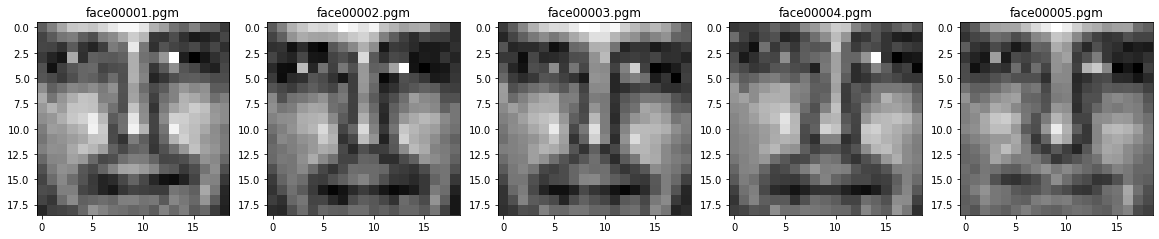

In [4]:
import matplotlib.pyplot as plt

train_name='train'
name='facesdetection'
path='/content/'+name+'/'+train_name+'/'+'face'+'/'
path_nonface='/content/'+name+'/'+train_name+'/'+'non-face'+'/'

face_train_names=sorted(os.listdir(path))
non_face_train_names=sorted(os.listdir(path_nonface))

_, axs = plt.subplots(1, 5, figsize=(20, 20))
axs = axs.flatten()

import cv2
for name,ax in zip(face_train_names[:5],axs):
  ax.imshow(cv2.imread(path+name, cv2.IMREAD_GRAYSCALE), cmap='gray')
  ax.set_title(name)
plt.show()

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def standartization(names,path):
  A=np.zeros((len(names),19,19))
  #train_name='train'
  #name='facesdetection'
  #path='/content/'+name+'/'+train_name+'/'+'face'+'/'
  for i,name in enumerate(names):
    data=cv2.imread(path+name, cv2.IMREAD_GRAYSCALE)
    standardized_data = StandardScaler().fit_transform(data)
    A[i,:,:]=standardized_data
  return A

In [6]:
len(non_face_train_names)
N=500

In [7]:
path_face=path
path_nonface='/content/facesdetection/'+train_name+'/'+'non-face'+'/'

faces_stand=standartization(face_train_names[:N],path=path_face) # с лицами
non_faces_stand=standartization(non_face_train_names[:N],path=path_nonface) # без лиц

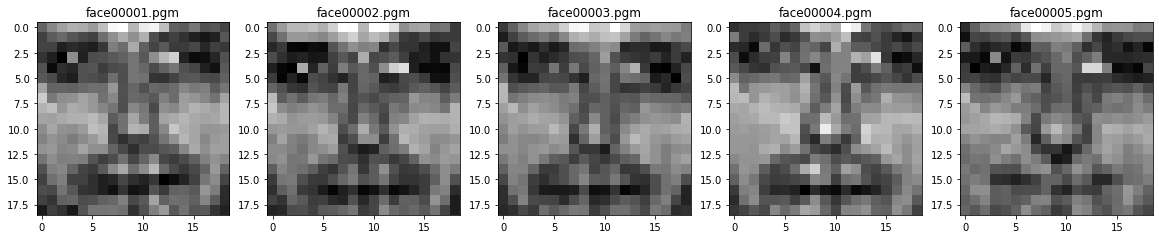

In [8]:
_, axs = plt.subplots(1, 5, figsize=(20, 20))
axs = axs.flatten()

for image,ax,name in zip(faces_stand[:5],axs,face_train_names[:5]):
  ax.imshow(image,cmap='gray') 
  ax.set_title(name)
plt.show()

In [9]:
import cv2  
import numpy as np
from google.colab.patches import cv2_imshow

def integral_image(faces,N):
  B=np.zeros((N,20,20))
  for i,image in enumerate(faces):
    #image = cv2.imread(path+name, cv2.IMREAD_GRAYSCALE)
    rows,cols=image.shape 
    sum = np.zeros((rows,cols),np.int32)  
    imageIntegral = cv2.integral(image, sum,-1)  
    #ax.imshow(imageIntegral)
    B[i,:,:]= imageIntegral
  return B

In [10]:
integ_image=integral_image(faces_stand,N)
non_integ_image=integral_image(non_faces_stand,N)

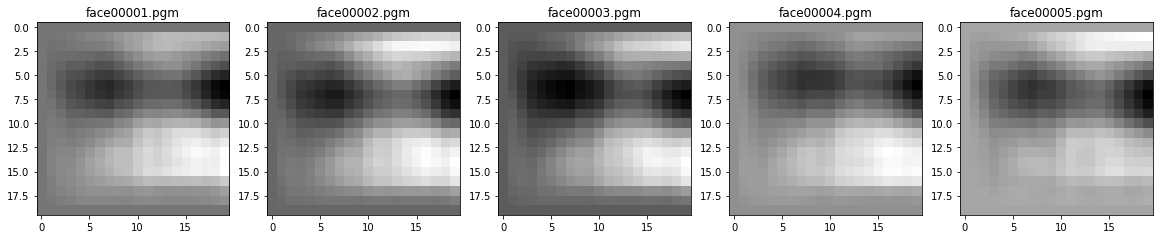

In [11]:
_, axs = plt.subplots(1, 5, figsize=(20, 20))
axs = axs.flatten()

for image,ax,name in zip(integ_image[:5],axs,face_train_names[:5]):
  ax.imshow(image,cmap='gray') 
  ax.set_title(name)
plt.show()

In [12]:
#train
os.mkdir('/content/faces_train')
os.mkdir('/content/faces_train/face')
#train non-face
os.mkdir('/content/faces_train/non_face')
# сохранить как .bmp
def save_bmp(faces,path):
  for i,image in enumerate(faces):
    cv2.imwrite(path+'/'+'pict{}.bmp'.format(i),image)
  print('сохранено в '+path)

In [13]:
path='/content/faces_train/face'
save_bmp(integ_image,path)
path='/content/faces_train/non_face'
save_bmp(non_integ_image,path)

сохранено в /content/faces_train/face
сохранено в /content/faces_train/non_face


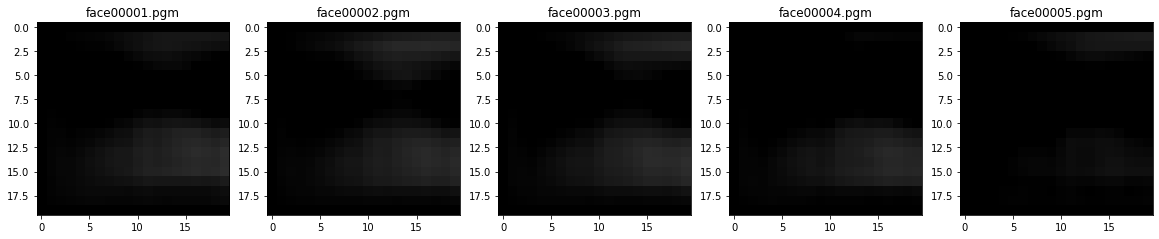

In [14]:
_, axs = plt.subplots(1, 5, figsize=(20, 20))
axs = axs.flatten()
path='/content/faces_train/face'
for i,ax,name in zip(range(5),axs,face_train_names[:5]):
  ax.imshow(cv2.imread(path+'/'+'pict{}.bmp'.format(i))) 
  ax.set_title(name)
plt.show()


In [15]:
attribute=' 1  0 0 14 14'
string_face='\n'.join(['face'+'/'+pict+attribute for pict in sorted(os.listdir('/content/faces_train/face'))])
string_non_face='\n'.join(['non_face'+'/'+path for path in sorted(os.listdir('/content/faces_train/non_face'))])

In [16]:
with open('/content/faces_train/face.txt','w') as f:
  f.write(string_face)

f.close()

with open('/content/faces_train/non_face.txt','w') as f:
  f.write(string_non_face)

f.close()

In [17]:
%cd /content/faces_train/
!opencv_createsamples -info /content/faces_train/face.txt -vec samples.vec -num 500 -w 18 -h 18

/content/faces_train
Info file name: /content/faces_train/face.txt
Img file name: (NULL)
Vec file name: samples.vec
BG  file name: (NULL)
Num: 500
BG color: 0
BG threshold: 80
Invert: FALSE
Max intensity deviation: 40
Max x angle: 1.1
Max y angle: 1.1
Max z angle: 0.5
Show samples: FALSE
Width: 18
Height: 18
Max Scale: -1
Create training samples from images collection...
Done. Created 500 samples


In [18]:
!ls

face  face.txt	non_face  non_face.txt	samples.vec


In [19]:
!opencv_traincascade -data /content/faces_train/ -vec samples.vec -bg non_face.txt -numStages 16 -minhitrate 0.999 -maxDepth 1 -maxWeakCount 10 -maxFalseAlarmRate 0.4 -numPos 400 -numNeg 500 -w 18 -h 18

PARAMETERS:
cascadeDirName: /content/faces_train/
vecFileName: samples.vec
bgFileName: non_face.txt
numPos: 400
numNeg: 500
numStages: 16
precalcValBufSize[Mb] : 1024
precalcIdxBufSize[Mb] : 1024
acceptanceRatioBreakValue : -1
stageType: BOOST
featureType: HAAR
sampleWidth: 18
sampleHeight: 18
boostType: GAB
minHitRate: 0.995
maxFalseAlarmRate: 0.4
weightTrimRate: 0.95
maxDepth: 1
maxWeakCount: 10
mode: BASIC
Number of unique features given windowSize [18,18] : 51705

===== TRAINING 0-stage =====
<BEGIN
POS count : consumed   400 : 400
NEG count : acceptanceRatio    500 : 1
Precalculation time: 2
+----+---------+---------+
|  N |    HR   |    FA   |
+----+---------+---------+
|   1|        1|        1|
+----+---------+---------+
|   2|        1|        1|
+----+---------+---------+
|   3|        1|     0.32|
+----+---------+---------+
END>
Training until now has taken 0 days 0 hours 0 minutes 5 seconds.

===== TRAINING 1-stage =====
<BEGIN
POS count : consumed   400 : 400
NEG count : a

In [20]:
import cv2
  
url='http://i.dailymail.co.uk/i/pix/2015/11/10/23/2E503F1500000578-3312647-image-a-39_1447197228350.jpg'
  
# читаем фото из интернета
import urllib.request
urllib.request.urlretrieve(url, '/content/1.jpg')
img=cv2.imread('/content/sachin.jpg')

In [ ]:
face_cascade = cv2.CascadeClassifier(r'/usr/local/lib/python3.6/dist-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'/usr/local/lib/python3.6/dist-packages/cv2/data/haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

In [ ]:
#cv2.imwrite(r'/content/res.png', img)

In [ ]:
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html

In [ ]:
#https://python-scripts.com/question/6503